In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()
#The cell above executes the style for this notebook.

---

<div class="alert alert-block alert-info">

Numerical simulation of Navier–Stokes equations</div>
=====
***

From the course we already know that the Navier-Stockes equations for conservation of mass and momentum of GNFs in vector form for a velocity field $\vec{\textbf{v}}$ is:

$$\nabla\cdot\vec{\textbf{v}}=0$$

$$\frac{\partial}{\partial t} (\rho \vec{\textbf{v}}) + \nabla \cdot (\rho \vec{\textbf{vv}} ) = -\nabla p + \nabla\cdot\left( \mu(\dot{\gamma}) \left(\nabla \vec{\textbf{v}} + (\nabla \vec{\textbf{v}})^T\right) \right) $$

It is easy to proof that given constant viscosity, in incompressible conditions, the above formulation will become:

$$\frac{\partial \vec{\textbf{v}}}{\partial t}+(\vec{\textbf{v}}\cdot\nabla)\vec{\textbf{v}}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{\textbf{v}}$$

This represents three scalar equations, one for each velocity component $\vec{\textbf{v}}=(u,v,w)$. 

But in the following test case, we will solve it in two dimensions, thus, reducing the velocity field to $\vec{\textbf{v}}=(u,v)$

Here is the system of differential equations: two equations for the velocity components $u,v$ and one equation for pressure:


$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

We can discretize these equations using different approaches. One of these approaches that used to be very popular is finite-difference. I know these equation is a little unfamiliar. But with a little patience, it will not be hard!

-------

<div class="alert alert-block alert-info">

Discretizing the equations</div>
----
***

<center><img src='flowwithgrid.png'></center>


First, let's discretize the $u$-momentum equation, as follows:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Similarly for the $v$-momentum equation:

$$
\begin{split}
&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Finally, the discretized pressure-Poisson equation can be written thus:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

You should write these equations down on your own notes, by hand, following each term mentally as you write it.

As before, let's rearrange the equations in the way that the iterations need to proceed in the code. First, the momentum equations for the velocity at the next time step.


The momentum equation in the $u$ direction:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)
\end{split}
$$

The momentum equation in the $v$ direction:

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}
$$

Almost there! Now, we rearrange the pressure-Poisson equation:

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

---

<div class="alert alert-block alert-info">

Cavity Flow Test Case</div>
----
***

The cavity flow problem is described in the following figure. 
Basically, there is a constant velocity across the top of the cavity which creates a circulating flow inside. 

To simulate this there is a constant velocity boundary condition applied to the lid, while the other three walls obey the no slip condition. 

Different Reynolds numbers give different results. At high Reynolds numbers we expect to see turbulent behaviour with a more interesting result with secondary circulation zones forming in the corners of the cavity.

![title](./domain-cavity.png)


The initial condition is $u, v, p = 0$ everywhere, and the boundary conditions are:

$u=1$ at $y=2$ (the "lid");

$u, v=0$ on the other boundaries;

$\frac{\partial p}{\partial y}=0$ at $y=0$;

$p=0$ at $y=2$

$\frac{\partial p}{\partial x}=0$ at $x=0,2$


---

<div class="alert alert-block alert-info">

Implementing Cavity Flow Solver</div>
----
***


In [129]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Specifying the characteristics of the test case:


In [130]:
L , H = 2, 2
nx = 41
ny = 41
nt = 500
nit = 50
c = 1


rho = 1
nu = .1
dt = .001

![title](./cavityflowwithgrid.png)


creating mesh (X,Y), velocity (u, v), and pressure (p) variables:


In [131]:
dx = L / (nx - 1)
dy = H / (ny - 1)
x = numpy.linspace(0, L, nx)
y = numpy.linspace(0, H, ny)
X, Y = numpy.meshgrid(x, y)


u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

plotting the created grid:


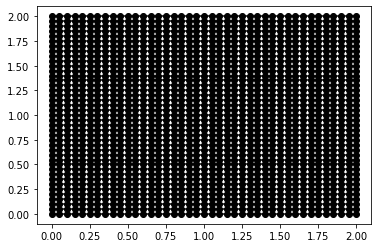

In [132]:
pyplot.plot(X, Y,c='k') # use plot, not scatter
pyplot.plot(numpy.transpose(X), numpy.transpose(Y),c='k') # add this here
pyplot.plot(X, Y, marker='o', color='k', linestyle='none')
pyplot.show()

<div class="alert alert-block alert-success">
The pressure Poisson equation that's written above can be hard to write out without typos.  The function `build_up_b` below represents the contents of the square brackets, so that the entirety of the PPE is slightly more manageable:</div>
$$
\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
$$


In [133]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

The function `pressure_poisson` is also defined to help segregate the different rounds of calculations.  Note the presence of the pseudo-time variable `nit`.  This sub-iteration in the Poisson calculation helps ensure a divergence-free field.  

In [134]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

Finally, the rest of the cavity flow equations are wrapped inside the function `cavity_flow`, allowing us to easily plot the results of the cavity flow solver for different lengths of time.  

In [135]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

Let's start with `nt = 100` and see what the solver gives us:

In [136]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

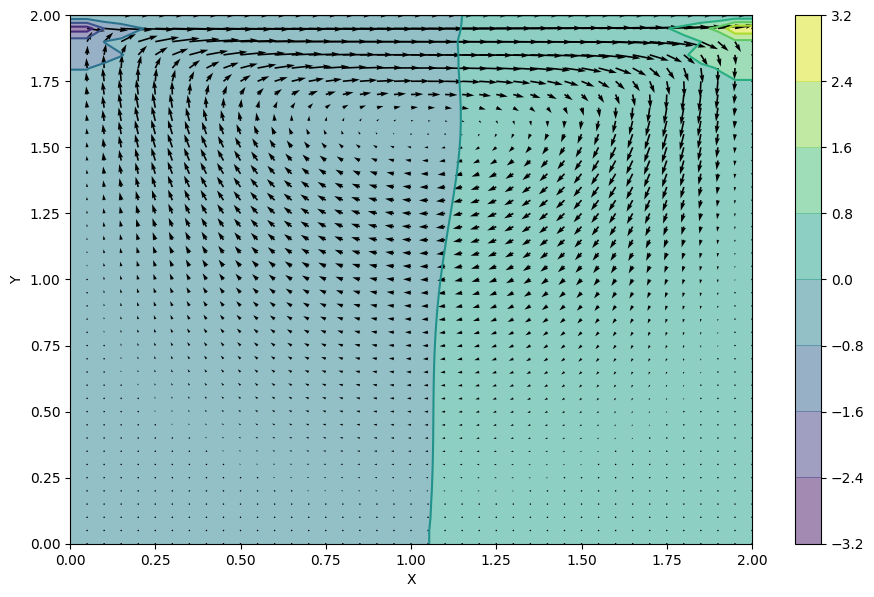

In [162]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting arrow velocity field
#pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.quiver(X, Y, u, v) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

You can see that two distinct pressure zones are forming and that the spiral pattern expected from lid-driven cavity flow is beginning to form.  Experiment with different values of `nt` to see how long the system takes to stabilize.  

In [138]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 700
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

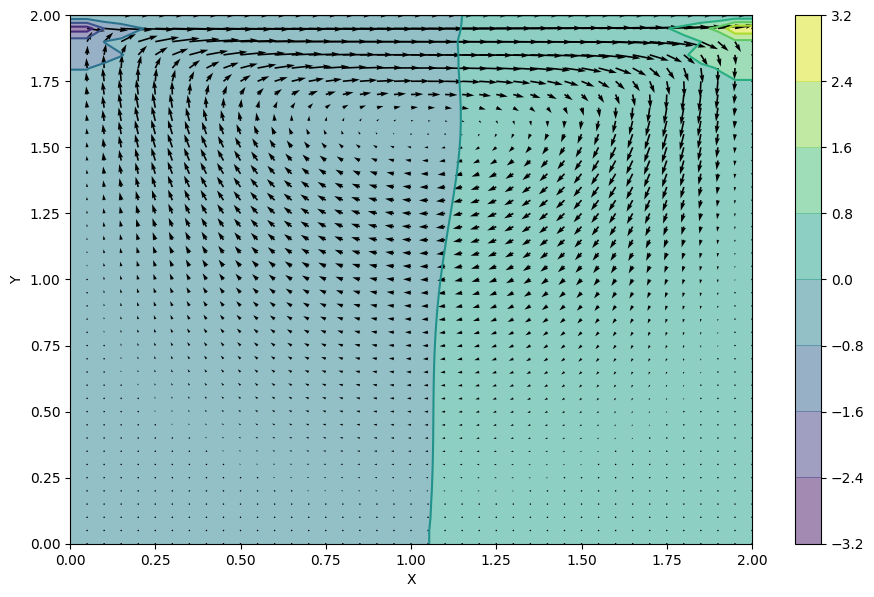

In [163]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
#pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pyplot.quiver(X, Y, u, v) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

The quiver plot shows the magnitude of the velocity at the discrete points in the mesh grid we created.
(if you think there are too many vectors and it's a bit of a mess tru to use `X[::2, ::2]` syntax to ask for every other point.)

Another way to visualize the flow in the cavity is to use a `streamplot`:

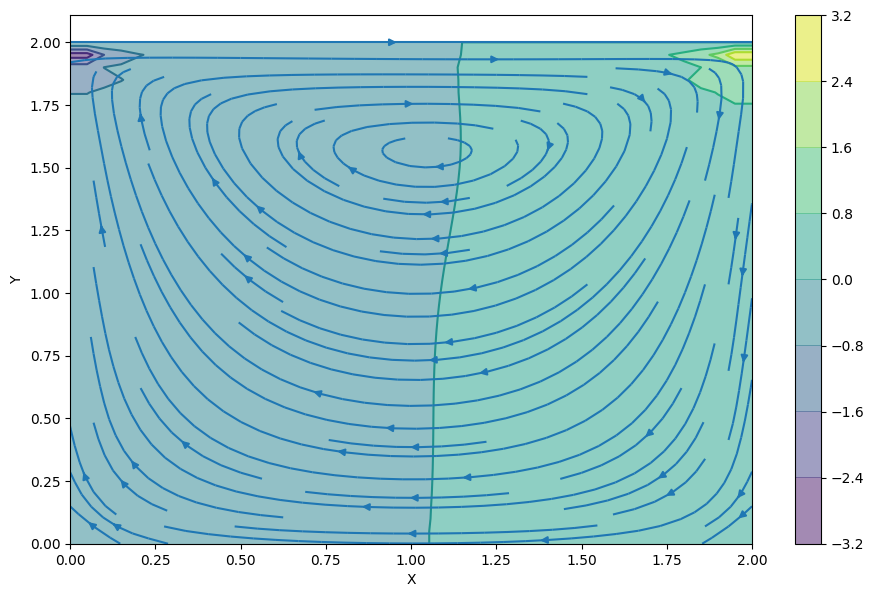

In [164]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y');

It is possible to replace the pressure contour with the velocity magnitude contour inside the domain:

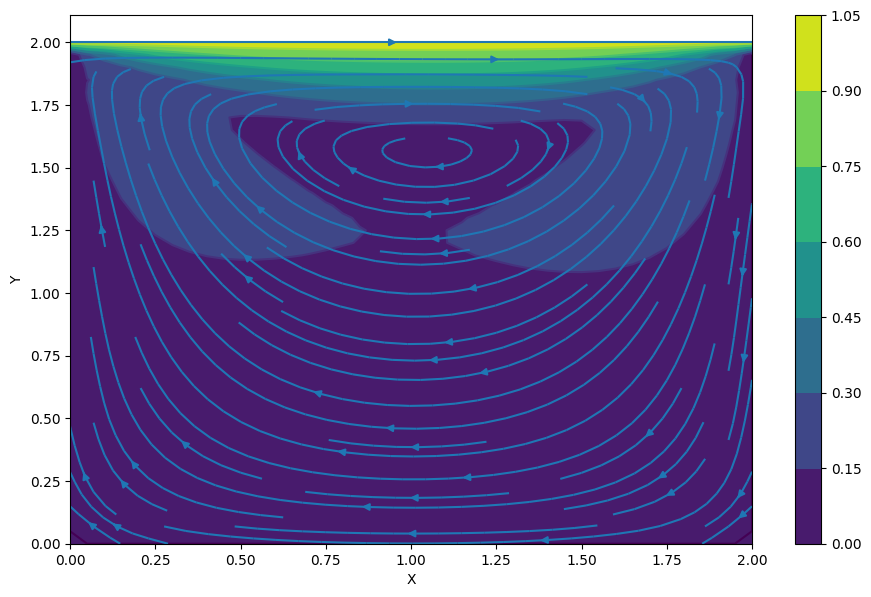

In [166]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
U = (u*u+v*v)**0.5
pyplot.contourf(X, Y, U, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, U, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [167]:
from IPython.display import Video

Video("shark.mp4")

---

<div class="alert alert-block alert-danger">

Your Tasks</div>
----
***

In [179]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 1000
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

(1/3) Run above the case with $50\times50$ grid spacing until nt = 1000. 
Fill the following functin that given (u, v, dx, dy, nu) calculates and returns the value of shear-rate at each point in the domain

In [178]:
def evalShearRate(u,v,dx,dy,nu):

    # start your code here

    
    # end your code here    
    
    return gammaDot

In [177]:
gammaDot = evalShearRate(u,v,dx,dy,nu)

Soluble carboxymethylcelluloses (CM-cellulose; CMC) available in varying viscosities are used as viscosity modifiers (thickeners) to stabilize emulsions and as a chemical dispersants of oils and other carbon structures such as nanotubes. 

CMCs are used in the development of biostructures such as biofilms, emulsions and nanoparticles for drug delivery. Carboxymethylcellulose, high viscosity, may be used to make solutions the consistency of creams or lotions.

For the CMC solutions up 0.5 wt%, it is considered that the viscosity of these solutions is dependent on the shear rate according to the Carreau-Yasuda model:
$$\mu_{eff} = \mu_{\infty} + (\mu_{0}-\mu_\infty)(1+\left(\lambda \dot{|\gamma|}\right)^{a_1})^\frac{a_2-1}{a_1} $$
For 0.4 wt% and 0.5 wt% solitions, these parameters are as:

|     | $\mu_\infty $ | $\mu_0$ | $\lambda$ | $a_1$ | $a_2$ |
| --- | --- | --- |--- |--- |--- |
| CMC 0.4 wt% | 0.001 | 0.110 | 0.110 | 0.809 | 0.675 |
| CMC 0.5 wt% | 0.001 | 0.220 | 0.063 | 0.565 | 0.509 |



(2/3) Using the calculated value of gammaDot, and rheology model of Carreu-Yasuda, calculate the local values of shear-stress $\tau$ at eavry point in the domain at time at instance of nt=1000

In [181]:
def evalShearStress(mu_inf, mu_0, Lambda, a1, a2):

    # start your code here

    
    # end your code here    
    
    return tau

In [183]:
tau_cmc0p4wt = evalShearStress(0.001,0.110,0.110,0.809,0.675) 
tau_cmc0p5wt = evalShearStress(0.001,0.220,0.063,0.565,0.509) 

(3/3) plot two graphs of $x - \tau_{yy}$ and $\tau_{xx} - y$ for two horizontal and vertical lines, respectively, that pass through the center of the doamin.